In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#import os
#print(os.listdir("../input"))

In [2]:
import os
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import plotly.express as px
import plotly.graph_objs as go


import pydicom
import glob
import imageio
from IPython.display import Image


import warnings
warnings.filterwarnings('ignore')

In [3]:
# List of files available in the given dataset
list(os.listdir("../input/osic-pulmonary-fibrosis-progression"))

['train.csv', 'train', 'test.csv', 'test', 'sample_submission.csv']

In [4]:
train_df = pd.read_csv('../input/osic-pulmonary-fibrosis-progression/train.csv')
test_df = pd.read_csv('../input/osic-pulmonary-fibrosis-progression/test.csv')

train_df.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


# **Data Exploration**

shape of data

In [5]:
print('Shape of Training data: ', train_df.shape)
print('Shape of Test data: ', test_df.shape)

Shape of Training data:  (1549, 7)
Shape of Test data:  (5, 7)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1549 non-null   object 
 1   Weeks          1549 non-null   int64  
 2   FVC            1549 non-null   int64  
 3   Percent        1549 non-null   float64
 4   Age            1549 non-null   int64  
 5   Sex            1549 non-null   object 
 6   SmokingStatus  1549 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 84.8+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        5 non-null      object 
 1   Weeks          5 non-null      int64  
 2   FVC            5 non-null      int64  
 3   Percent        5 non-null      float64
 4   Age            5 non-null      int64  
 5   Sex            5 non-null      object 
 6   SmokingStatus  5 non-null      object 
dtypes: float64(1), int64(3), object(3)
memory usage: 408.0+ bytes


No missing value in either train/test csv

In [8]:
print(f"The total patient ids are {train_df['Patient'].count()}")
print(f"Number of unique ids are {train_df['Patient'].value_counts().shape[0]} ")

The total patient ids are 1549
Number of unique ids are 176 


There are multiple records of the same patient as the number of unique ids are less than total patient ids record.

# Visualizing the Data

In [35]:
new_df = train_df.groupby([train_df.Patient,train_df.Age,train_df.Sex, train_df.SmokingStatus])['Patient'].count()
new_df.index = new_df.index.set_names(['id','Age','Sex','SmokingStatus'])
new_df = new_df.reset_index()
new_df.rename(columns = {'Patient': 'freq'},inplace = True)
new_df.head()
#print(new_df)


Patient                    Age  Sex   SmokingStatus
ID00007637202177411956430  79   Male  Ex-smoker         9
ID00009637202177434476278  69   Male  Ex-smoker         9
ID00010637202177584971671  60   Male  Ex-smoker         9
ID00011637202177653955184  72   Male  Ex-smoker         9
ID00012637202177665765362  65   Male  Never smoked      9
                                                       ..
ID00419637202311204720264  73   Male  Ex-smoker         9
ID00421637202311550012437  68   Male  Ex-smoker        10
ID00422637202311677017371  73   Male  Ex-smoker         8
ID00423637202312137826377  72   Male  Ex-smoker         9
ID00426637202313170790466  73   Male  Never smoked      9
Name: Patient, Length: 176, dtype: int64

In [10]:
fig = px.bar(new_df, x='id',y ='freq',color='freq')
fig.update_layout(xaxis={'categoryorder':'total ascending'},title='No. of observations for each patient')
fig.update_xaxes(showticklabels=False)
fig.show()

In [11]:
fig = px.histogram(new_df, x='Age',nbins = 42)
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                 marker_line_width=1.5, opacity=0.6)
fig.update_layout(title = 'Distribution of Age for unique patients')
fig.show()

In [12]:
patient1 = train_df[train_df.Patient == 'ID00007637202177411956430']
patient2 = train_df[train_df.Patient == 'ID00012637202177665765362']
patient3 = train_df[train_df.Patient == 'ID00082637202201836229724']


patient1['text'] ='ID: ' + (patient1['Patient']).astype(str) + '<br>FVC ' + patient1['FVC'].astype(str) + '<br>Percent ' + patient1['Percent'].astype(str) + '<br>Week ' + patient1['Weeks'].astype(str)
patient2['text'] ='ID: ' + (patient2['Patient']).astype(str) + '<br>FVC ' + patient2['FVC'].astype(str)+ '<br>Percent ' + patient2['Percent'].astype(str)  + '<br>Week ' + patient2['Weeks'].astype(str)
patient3['text'] ='ID: ' + (patient3['Patient']).astype(str) + '<br>FVC ' + patient3['FVC'].astype(str) + '<br>Percent ' + patient3['Percent'].astype(str) + '<br>Week ' + patient3['Weeks'].astype(str)


fig = go.Figure()
fig.add_trace(go.Scatter(x=patient1['Weeks'], y=patient1['FVC'],hovertext = patient1['text'],
                    mode='lines+markers',marker=dict(size = 12,line_width = 2),
                    name='Ex-smoker'))
fig.add_trace(go.Scatter(x=patient2['Weeks'], y=patient2['FVC'],hovertext = patient2['text'],
                    mode='lines+markers',marker=dict(size = 12,line_width = 2),
                    name='Never smoked'))
fig.add_trace(go.Scatter(x=patient3['Weeks'], y=patient3['FVC'],hovertext = patient3['text'],
                    mode='lines+markers',marker=dict(size = 12,line_width = 2), name='Currently smokes'))

fig.update(layout_title_text='FVC vs Weeks for 3 different patients')
fig.update_layout( width=700,height=500)
fig.show()

DICOM IMAGE PREPROCESSING

In [13]:
import pydicom
from pydicom.data import get_testdata_files

print(__doc__)

PathDicom = '/kaggle/input/osic-pulmonary-fibrosis-progression/'
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

Automatically created module for IPython interactive environment


In [14]:
print(lstFilesDCM[0])

/kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00060637202187965290703/107.dcm


In [15]:
data_path = '../input/osic-pulmonary-fibrosis-progression/train/'

train_image_files = sorted(glob.glob(os.path.join(data_path, '*','*.dcm')))
patients = os.listdir(data_path)
patients.sort()
print('Some sample Patient ID''s :', len(train_image_files))
print("\n".join(train_image_files[:5]))

Some sample Patient IDs : 33026
../input/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/1.dcm
../input/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/10.dcm
../input/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/11.dcm
../input/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/12.dcm
../input/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/13.dcm


In [16]:
def load_scan(path):
    """
    Loads scans from a folder and into a list.
    
    Parameters: path (Folder path)
    
    Returns: slices (List of slices)
    """
    
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.InstanceNumber))
    
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices

In [18]:
def get_pixels_hu(scans):
    """
    Converts raw images to Hounsfield Units (HU).
    
    Parameters: scans (Raw images)
    
    Returns: image (NumPy array)
    """
    
    image = np.stack([s.pixel_array for s in scans])
    image = image.astype(np.int16)

    # Since the scanning equipment is cylindrical in nature and image output is square,
    # we set the out-of-scan pixels to 0
    image[image == -2000] = 0
    
    
    # HU = m*P + b
    intercept = scans[0].RescaleIntercept
    slope = scans[0].RescaleSlope
    
    if slope != 1:
        image = slope * image.astype(np.float64)
        image = image.astype(np.int16)
        
    image += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)

In [19]:
#print(patients[1:5])
print(patients[2])
#print(patients[3])
print(patients[5])


ID00010637202177584971671
ID00014637202177757139317


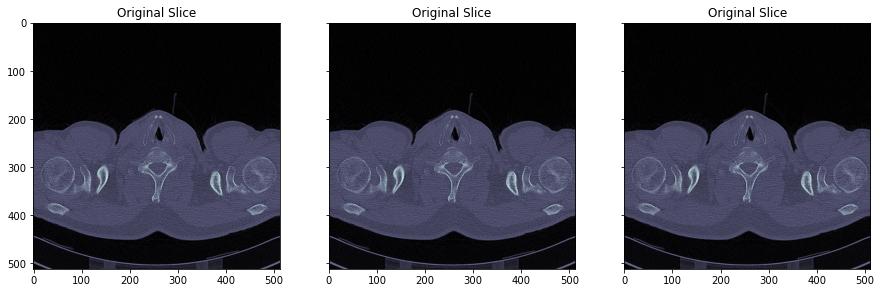

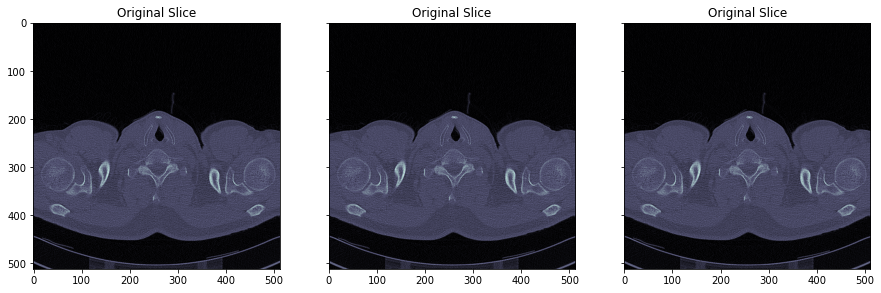

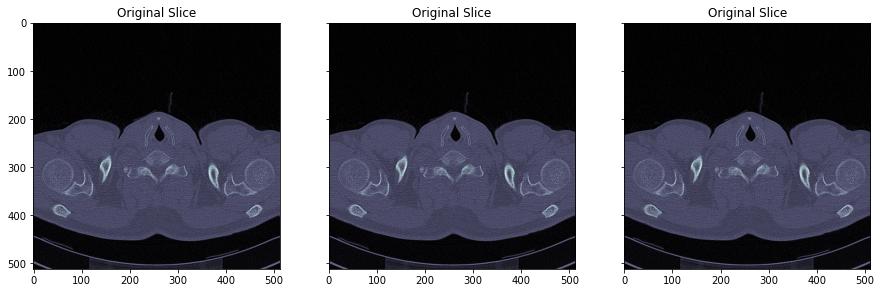

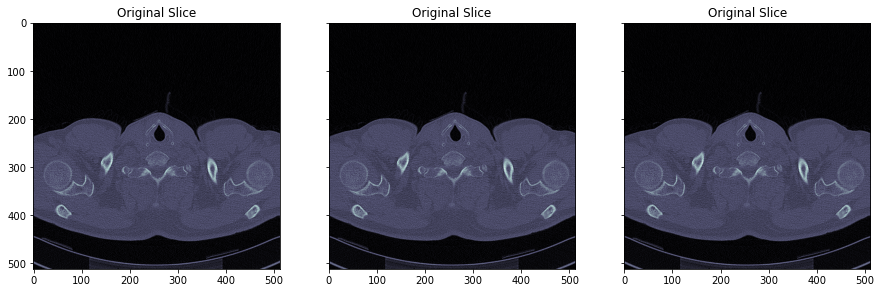

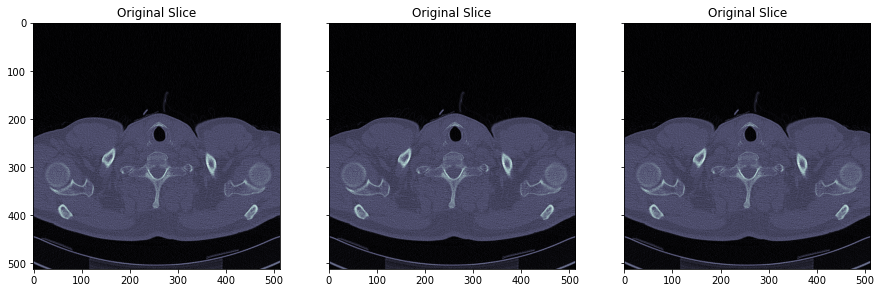

106


In [20]:
test_patient_scans = load_scan(data_path + patients[2])
test_patient_images = get_pixels_hu(test_patient_scans)

#We'll be taking a random slice to perform segmentation:

for imgs in range(len(test_patient_images[:5])):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,15))
    ax1.imshow(test_patient_images[imgs], cmap=plt.cm.bone)
    ax1.set_title("Original Slice")
    
    ax2.imshow(test_patient_images[imgs], cmap=plt.cm.bone)
    ax2.set_title("Original Slice")
    
    ax3.imshow(test_patient_images[imgs], cmap=plt.cm.bone)
    ax3.set_title("Original Slice")
    plt.show()
    
print(len(test_patient_images))    

In [21]:
from skimage import measure, morphology, segmentation
import scipy.ndimage as ndimage
import os
import copy
from datetime import timedelta, datetime
import imageio
import matplotlib.pyplot as plt
from matplotlib import cm
import multiprocessing
import numpy as np
import os
from pathlib import Path
import pydicom
import pytest
import scipy.ndimage as ndimage
from scipy.ndimage.interpolation import zoom
from skimage import measure, morphology, segmentation
from skimage.transform import resize
from time import time, sleep
from tqdm import trange, tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
from tensorflow.data import Dataset
import torch
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
import warnings
import seaborn as sns
import glob as glob
import imageio
from IPython.display import Image

#for masking
from skimage.measure import label,regionprops
from sklearn.cluster import KMeans
from skimage.segmentation import clear_border


In [22]:
def generate_markers(image):
    """
    Generates markers for a given image.
    
    Parameters: image
    
    Returns: Internal Marker, External Marker, Watershed Marker
    """
    
    #Creation of the internal Marker
    marker_internal = image < -400
    marker_internal = segmentation.clear_border(marker_internal)
    marker_internal_labels = measure.label(marker_internal)
    
    areas = [r.area for r in measure.regionprops(marker_internal_labels)]
    areas.sort()
    
    if len(areas) > 2:
        for region in measure.regionprops(marker_internal_labels):
            if region.area < areas[-2]:
                for coordinates in region.coords:                
                       marker_internal_labels[coordinates[0], coordinates[1]] = 0
    
    marker_internal = marker_internal_labels > 0
    
    # Creation of the External Marker
    external_a = ndimage.binary_dilation(marker_internal, iterations=10)
    external_b = ndimage.binary_dilation(marker_internal, iterations=55)
    marker_external = external_b ^ external_a
    
    # Creation of the Watershed Marker
    marker_watershed = np.zeros((512, 512), dtype=np.int)
    marker_watershed += marker_internal * 255
    marker_watershed += marker_external * 128
    
    return marker_internal, marker_external, marker_watershed

Marker Watershed Transformation

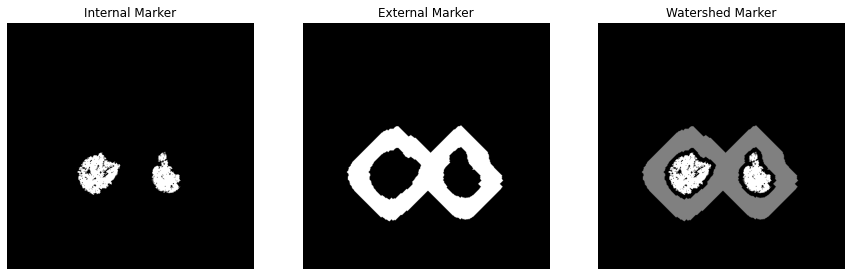

In [23]:
test_patient_internal, test_patient_external, test_patient_watershed = generate_markers(test_patient_images[15])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,15))

ax1.imshow(test_patient_internal, cmap='gray')
ax1.set_title("Internal Marker")
ax1.axis('off')

ax2.imshow(test_patient_external, cmap='gray')
ax2.set_title("External Marker")
ax2.axis('off')

ax3.imshow(test_patient_watershed, cmap='gray')
ax3.set_title("Watershed Marker")
ax3.axis('off')

plt.show()

Text(0.5, 1.0, 'Original Image')

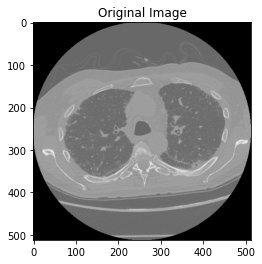

In [24]:
sample_image = pydicom.dcmread(train_image_files[2])
img = sample_image.pixel_array

plt.imshow(img, cmap='gray')
plt.title('Original Image')

Text(0.5, 1.0, 'Binary Mask Image')

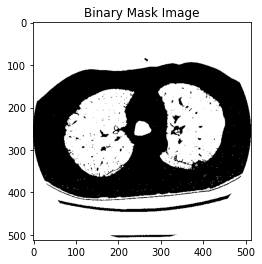

In [25]:
img = (img + sample_image.RescaleIntercept) / sample_image.RescaleSlope
img = img < -400 #HU unit range for lungs CT SCAN

plt.imshow(img, cmap='gray')
plt.title('Binary Mask Image')

Text(0.5, 1.0, 'Cleaned Border Image')

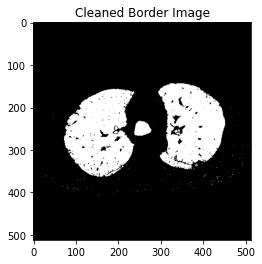

In [26]:
img = clear_border(img)
plt.imshow(img, cmap='gray')
plt.title('Cleaned Border Image')

In [27]:
# https://www.raddq.com/dicom-processing-segmentation-visualization-in-python/

def make_lungmask(img, display=False):
    row_size= img.shape[0]
    col_size = img.shape[1]
    
    mean = np.mean(img)
    std = np.std(img)
    img = img-mean
    img = img/std
    
    # Find the average pixel value near the lungs
        # to renormalize washed out images
    middle = img[int(col_size/5):int(col_size/5*4),int(row_size/5):int(row_size/5*4)] 
    mean = np.mean(middle)  
    max = np.max(img)
    min = np.min(img)
    
    # To improve threshold finding, I'm moving the 
    # underflow and overflow on the pixel spectrum
    img[img==max]=mean
    img[img==min]=mean
    
    # Using Kmeans to separate foreground (soft tissue / bone) and background (lung/air)
    
    kmeans = KMeans(n_clusters=2).fit(np.reshape(middle,[np.prod(middle.shape),1]))
    centers = sorted(kmeans.cluster_centers_.flatten())
    threshold = np.mean(centers)
    thresh_img = np.where(img<threshold,1.0,0.0)  # threshold the image

    # First erode away the finer elements, then dilate to include some of the pixels surrounding the lung.  
    # We don't want to accidentally clip the lung.

    eroded = morphology.erosion(thresh_img,np.ones([3,3]))
    dilation = morphology.dilation(eroded,np.ones([8,8]))

    labels = measure.label(dilation) # Different labels are displayed in different colors
    label_vals = np.unique(labels)
    regions = measure.regionprops(labels)
    good_labels = []
    for prop in regions:
        B = prop.bbox
        if B[2]-B[0]<row_size/10*9 and B[3]-B[1]<col_size/10*9 and B[0]>row_size/5 and B[2]<col_size/5*4:
            good_labels.append(prop.label)
    mask = np.ndarray([row_size,col_size],dtype=np.int8)
    mask[:] = 0


    #  After just the lungs are left, we do another large dilation
    #  in order to fill in and out the lung mask 
    
    for N in good_labels:
        mask = mask + np.where(labels==N,1,0)
    mask = morphology.dilation(mask,np.ones([10,10])) # one last dilation

    if (display):
        fig, ax = plt.subplots(3, 2, figsize=[12, 12])
        ax[0, 0].set_title("Original")
        ax[0, 0].imshow(img, cmap='gray')
        ax[0, 0].axis('off')
        ax[0, 1].set_title("Threshold")
        ax[0, 1].imshow(thresh_img, cmap='gray')
        ax[0, 1].axis('off')
        ax[1, 0].set_title("After Erosion and Dilation")
        ax[1, 0].imshow(dilation, cmap='gray')
        ax[1, 0].axis('off')
        ax[1, 1].set_title("Color Labels")
        ax[1, 1].imshow(labels)
        ax[1, 1].axis('off')
        ax[2, 0].set_title("Final Mask")
        ax[2, 0].imshow(mask, cmap='gray')
        ax[2, 0].axis('off')
        ax[2, 1].set_title("Apply Mask on Original")
        ax[2, 1].imshow(mask*img, cmap='gray')
        ax[2, 1].axis('off')
        
        plt.show()
    return mask*img

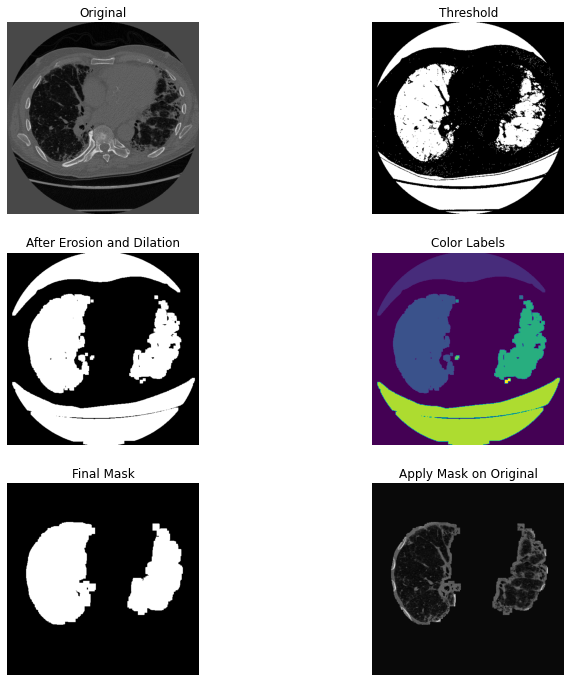

In [28]:
path = "../input/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/19.dcm"
dataset = pydicom.dcmread(path)
img = dataset.pixel_array

# Masked image
mask_img = make_lungmask(img, display=True)

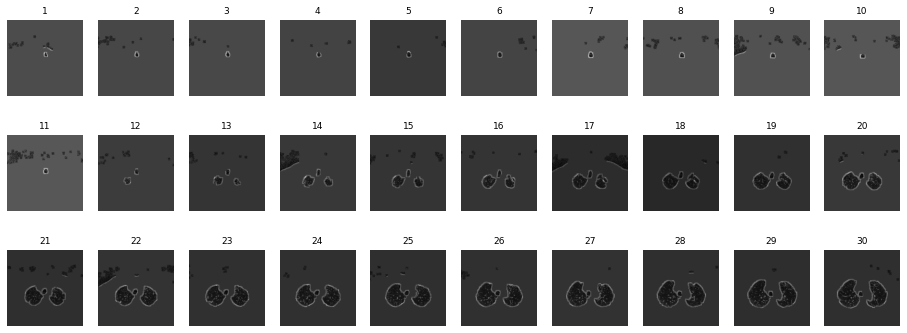

In [29]:
import re
patient_dir = "../input/osic-pulmonary-fibrosis-progression/train/ID00010637202177584971671"
test_patient_scans = load_scan(data_path + patients[2])
datasets = []

# First Order the files in the dataset
files = []
for dcm in list(os.listdir(patient_dir)):
    files.append(dcm) 
files.sort(key=lambda f: int(re.sub('\D', '', f)))

# Read in the Dataset
for dcm in files:
    path = patient_dir + "/" + dcm
    datasets.append(pydicom.dcmread(path))
    
imgs = []
for data in datasets:
    img = data.pixel_array
    imgs.append(img)
    
    
# Show masks
fig=plt.figure(figsize=(16, 6))
columns = 10
rows = 3

for i in range(1, columns*rows +1):
    img = make_lungmask(datasets[i-1].pixel_array)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
    plt.title(i, fontsize = 9)
    plt.axis('off');

In [30]:
print(files)

['1.dcm', '2.dcm', '3.dcm', '4.dcm', '5.dcm', '6.dcm', '7.dcm', '8.dcm', '9.dcm', '10.dcm', '11.dcm', '12.dcm', '13.dcm', '14.dcm', '15.dcm', '16.dcm', '17.dcm', '18.dcm', '19.dcm', '20.dcm', '21.dcm', '22.dcm', '23.dcm', '24.dcm', '25.dcm', '26.dcm', '27.dcm', '28.dcm', '29.dcm', '30.dcm', '31.dcm', '32.dcm', '33.dcm', '34.dcm', '35.dcm', '36.dcm', '37.dcm', '38.dcm', '39.dcm', '40.dcm', '41.dcm', '42.dcm', '43.dcm', '44.dcm', '45.dcm', '46.dcm', '47.dcm', '48.dcm', '49.dcm', '50.dcm', '51.dcm', '52.dcm', '53.dcm', '54.dcm', '55.dcm', '56.dcm', '57.dcm', '58.dcm', '59.dcm', '60.dcm', '61.dcm', '62.dcm', '63.dcm', '64.dcm', '65.dcm', '66.dcm', '67.dcm', '68.dcm', '69.dcm', '70.dcm', '71.dcm', '72.dcm', '73.dcm', '74.dcm', '75.dcm', '76.dcm', '77.dcm', '78.dcm', '79.dcm', '80.dcm', '81.dcm', '82.dcm', '83.dcm', '84.dcm', '85.dcm', '86.dcm', '87.dcm', '88.dcm', '89.dcm', '90.dcm', '91.dcm', '92.dcm', '93.dcm', '94.dcm', '95.dcm', '96.dcm', '97.dcm', '98.dcm', '99.dcm', '100.dcm', '101.dc

In [31]:
def get_observation_data(path):
    '''Get information from the .dcm files.
    path: complete path to the .dcm file'''

    image_data = pydicom.read_file(path)

    # Dictionary to store the information from the image
    observation_data = {
        "FileNumber" : path.split('/')[5],
        "Rows" : image_data.Rows,
        "Columns" : image_data.Columns,

        "PatientID" : image_data.PatientID,
        "BodyPartExamined" : image_data.BodyPartExamined,
        "SliceThickness" : int(image_data.SliceThickness),
        "KVP" : int(image_data.KVP),
        "DistanceSourceToDetector" : int(image_data.DistanceSourceToDetector),
        "DistanceSourceToPatient" : int(image_data.DistanceSourceToPatient),
        "GantryDetectorTilt" : int(image_data.GantryDetectorTilt),
        "TableHeight" : int(image_data.TableHeight),
        "RotationDirection" : image_data.RotationDirection,
        "XRayTubeCurrent" : int(image_data.XRayTubeCurrent),
        "GeneratorPower" : int(image_data.GeneratorPower),
        "ConvolutionKernel" : image_data.ConvolutionKernel,
        "PatientPosition" : image_data.PatientPosition,

        "ImagePositionPatient" : str(image_data.ImagePositionPatient),
        "ImageOrientationPatient" : str(image_data.ImageOrientationPatient),
        "PhotometricInterpretation" : image_data.PhotometricInterpretation,
        "ImageType" : str(image_data.ImageType),
        "PixelSpacing" : str(image_data.PixelSpacing),
        "WindowCenter" : int(image_data.WindowCenter),
        "WindowWidth" : int(image_data.WindowWidth),
        "Modality" : image_data.Modality,
        "StudyInstanceUID" : image_data.StudyInstanceUID,
        "PixelPaddingValue" : image_data.PixelPaddingValue,
        "SamplesPerPixel" : image_data.SamplesPerPixel,
        "SliceLocation" : int(image_data.SliceLocation),
        "BitsAllocated" : image_data.BitsAllocated,
        "BitsStored" : image_data.BitsStored,
        "HighBit" : image_data.HighBit,
        "PixelRepresentation" : image_data.PixelRepresentation,
        "RescaleIntercept" : int(image_data.RescaleIntercept),
        "RescaleSlope" : int(image_data.RescaleSlope),
        "RescaleType" : image_data.RescaleType
    }
    
    return observation_data

In [32]:
class bcolors:
    OKBLUE = '\033[96m'
    OKGREEN = '\033[92m'

Patient id.......: ID00010637202177584971671 
Modality.........: CT 
Rows.............: 512 
Columns..........: 512


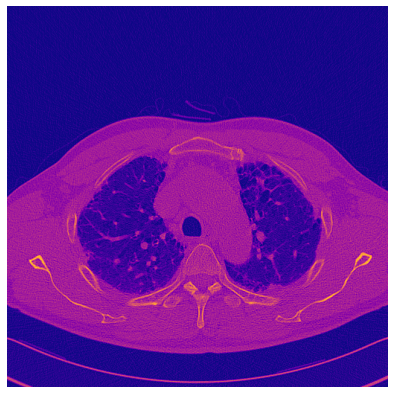

In [33]:
path = "../input/osic-pulmonary-fibrosis-progression/train/ID00010637202177584971671/30.dcm"
dataset = pydicom.dcmread(path)

print(bcolors.OKBLUE + "Patient id.......:", dataset.PatientID, "\n" +
      "Modality.........:", dataset.Modality, "\n" +
      "Rows.............:", dataset.Rows, "\n" +
      "Columns..........:", dataset.Columns)

plt.figure(figsize = (7, 7))
plt.imshow(dataset.pixel_array, cmap="plasma")
plt.axis('off');

In [34]:
meta_data_df = []
for filename in tqdm(train_image_files):
    try:
        meta_data_df.append(get_observation_data(filename))
    except Exception as e:
        continue

100%|██████████| 33026/33026 [05:37<00:00, 97.81it/s] 


In [ ]:
meta_data_df = pd.DataFrame.from_dict(meta_data_df)
meta_data_df
#print(".....Done")

In [ ]:
meta_data_df.to_csv('metadata.csv',index=False)

In [ ]:
#meta_data_df.to_csv('../input/osic-dicom-image-features/metadata.csv',index=False)

In [ ]:
dicom_df = pd.read_csv('/kaggle/working/metadata.csv') 
dicom_df.shape